<a href="https://colab.research.google.com/github/yash1thsa/machine_learning_pipelines/blob/main/EasyVisa_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
blosc2 3.5.1 requires numpy>=1.2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [183]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from datetime import datetime

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.neighbors import NearestNeighbors

## Import Dataset

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
data = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

In [102]:
data_bkup = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [103]:
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [104]:
data.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [105]:
data.shape #The dataset has 25480 rows and 12 columns

(25480, 12)

#### Check the data types of the columns for the dataset

In [106]:
data.info() #The dataset has 3 numeric columns and rest are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [107]:
data.describe(include='all').T #Negative values are present in no_of_employees column

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [108]:
data['no_of_employees'] = abs(data['no_of_employees'])

#### Let's check the count of each unique category in each of the categorical variables

In [109]:
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


In [110]:
data.isnull().sum() #Check for NULL column in the dataset

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [111]:
data.drop('case_id', axis=1, inplace = True) #Remove case_id has it has no meaningful insight

### Univariate Analysis

In [112]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [113]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [114]:
print(data.columns)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


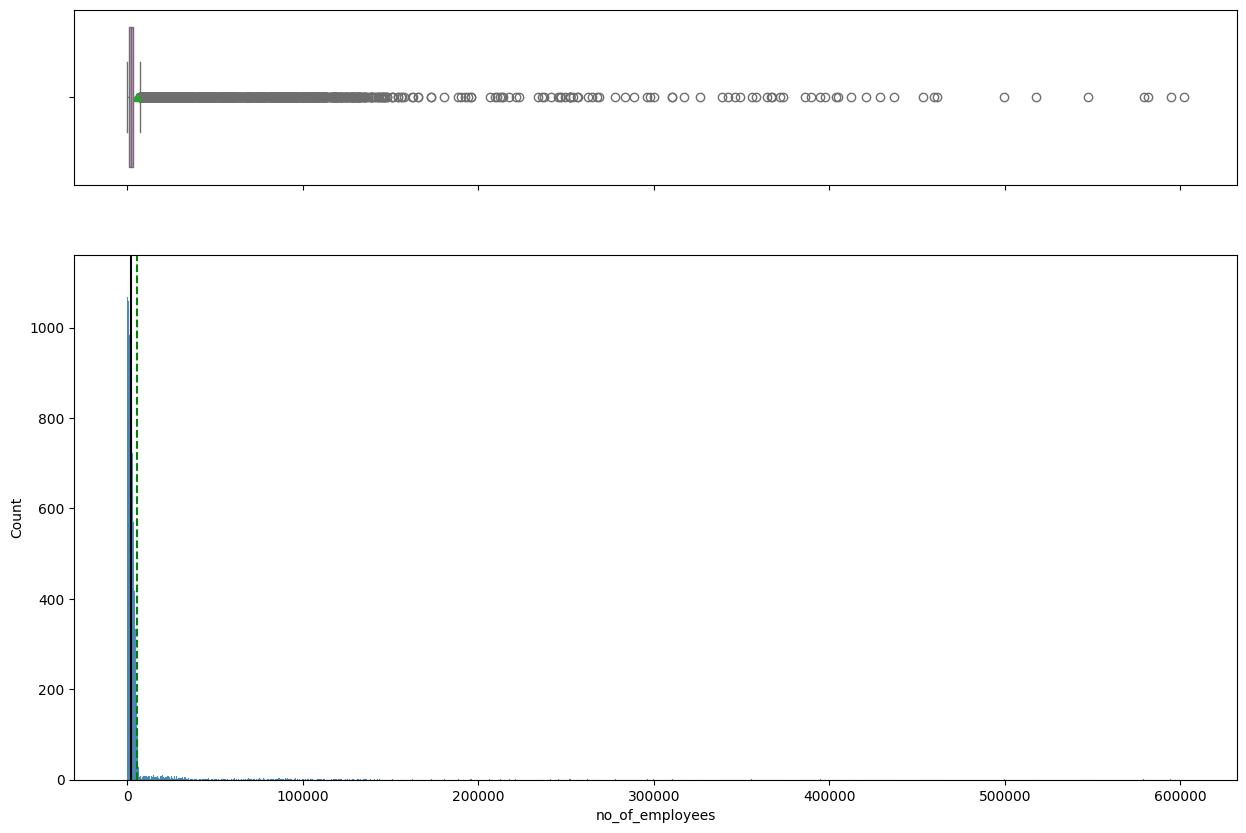

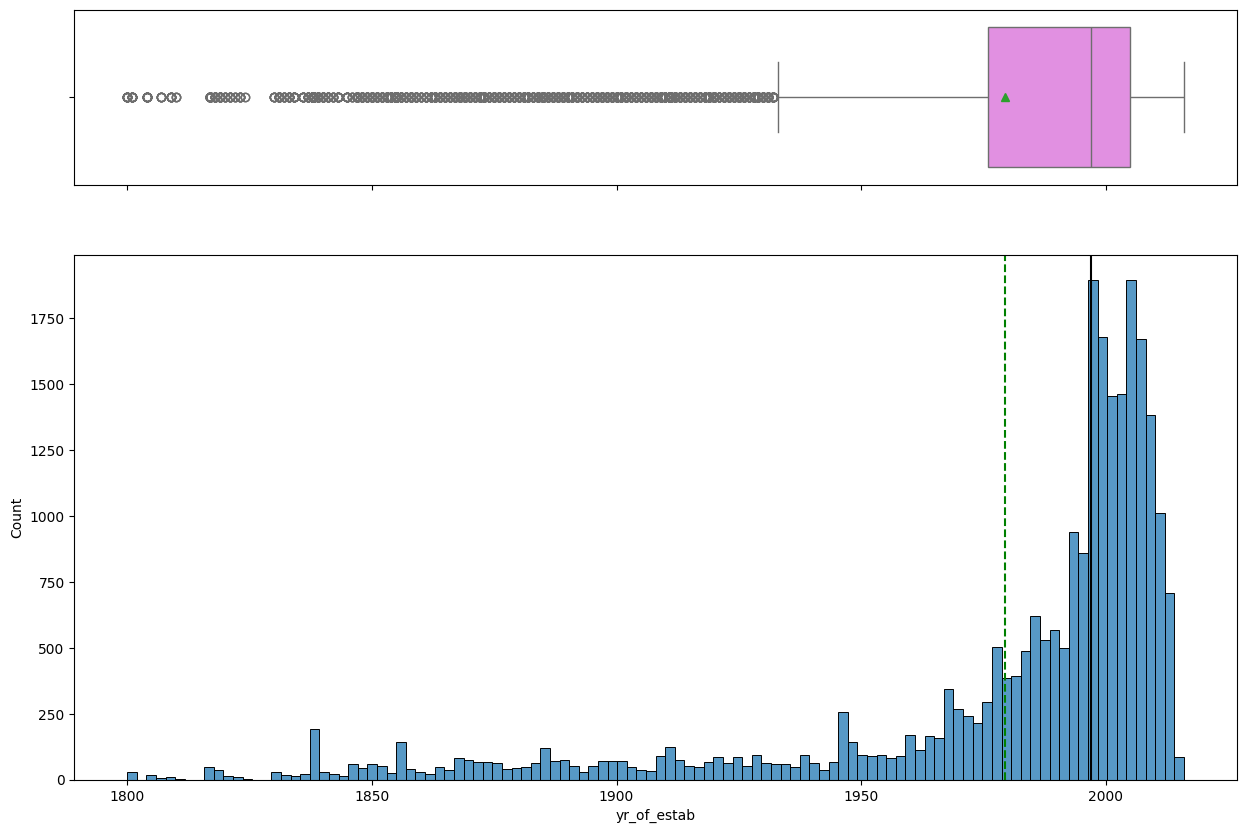

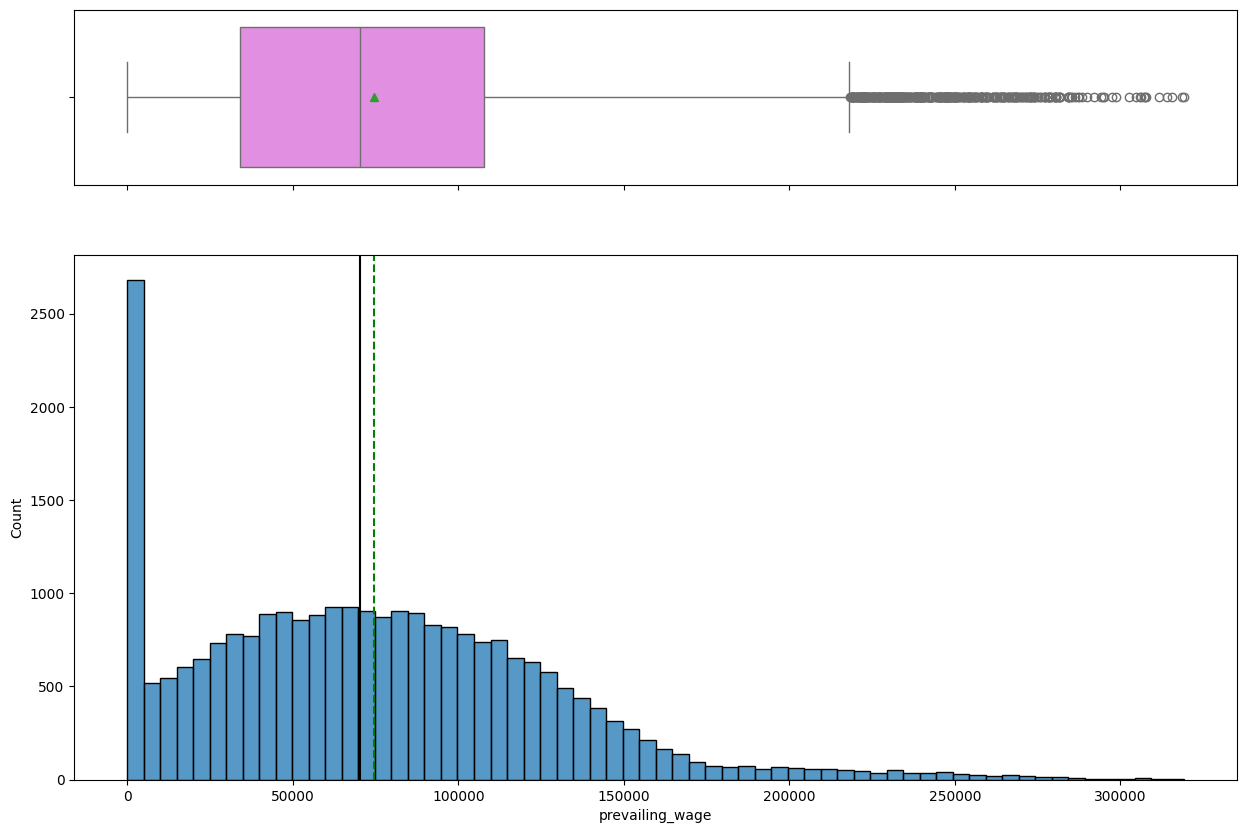

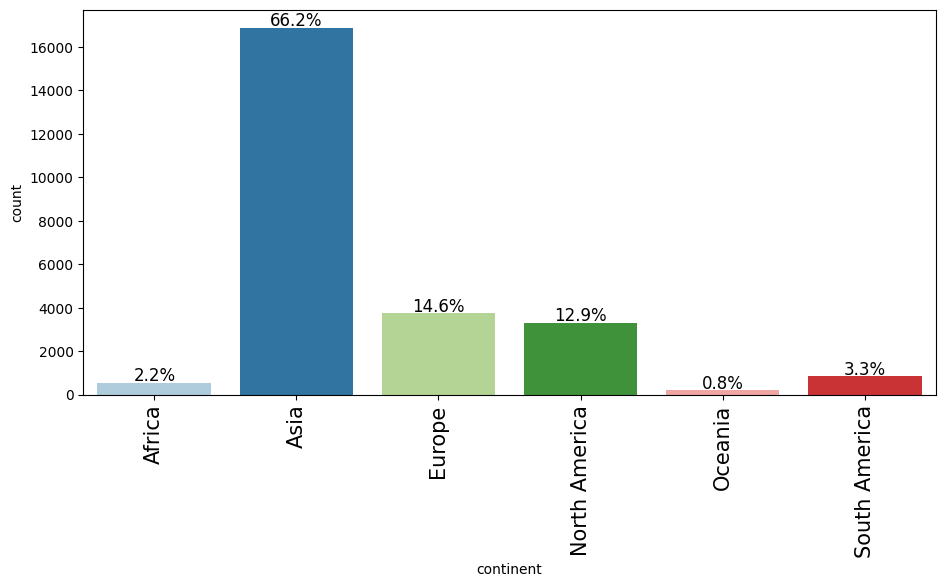

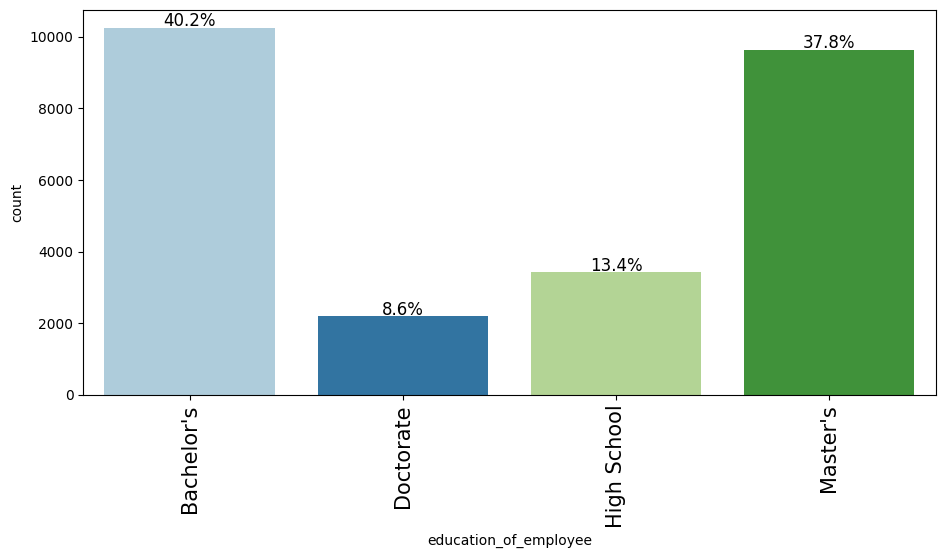

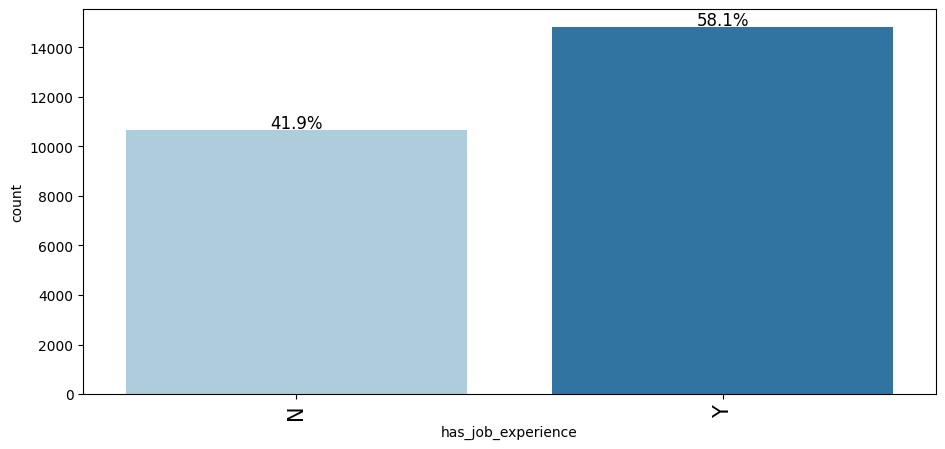

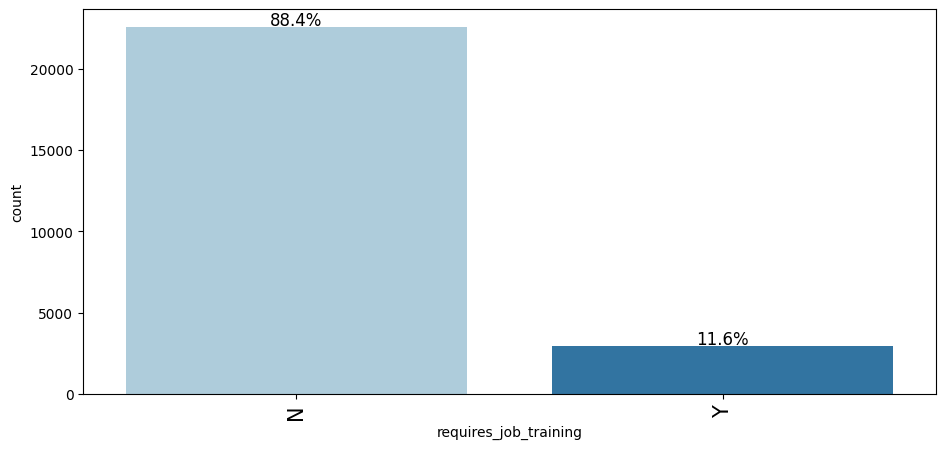

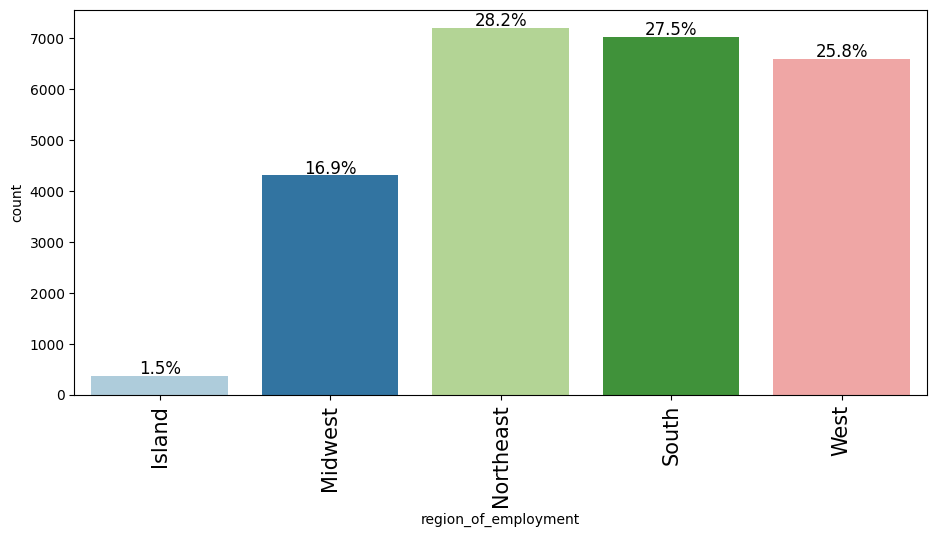

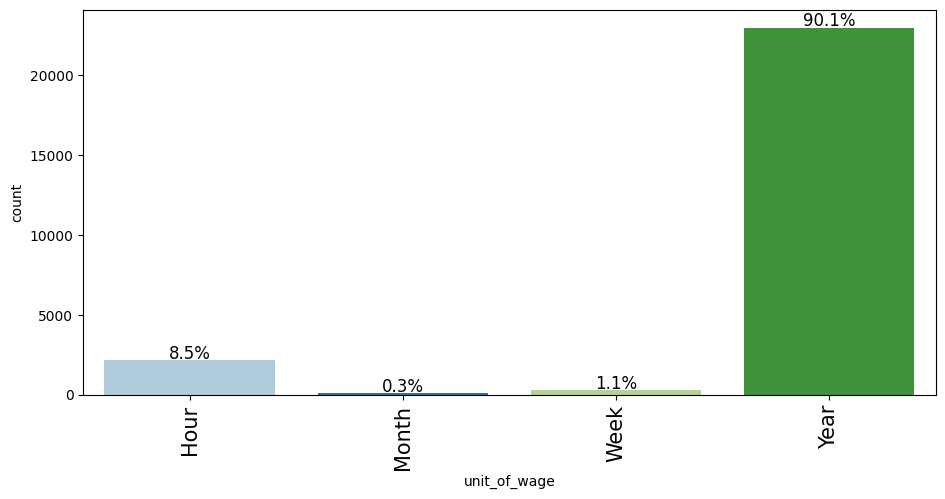

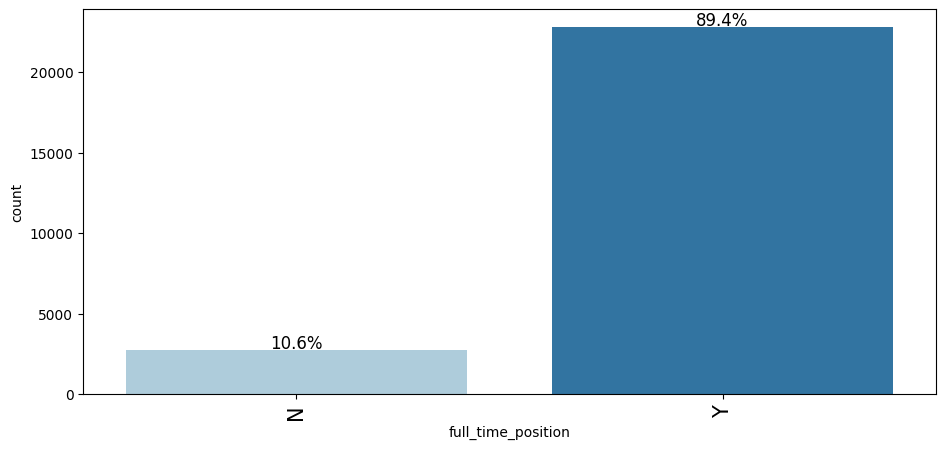

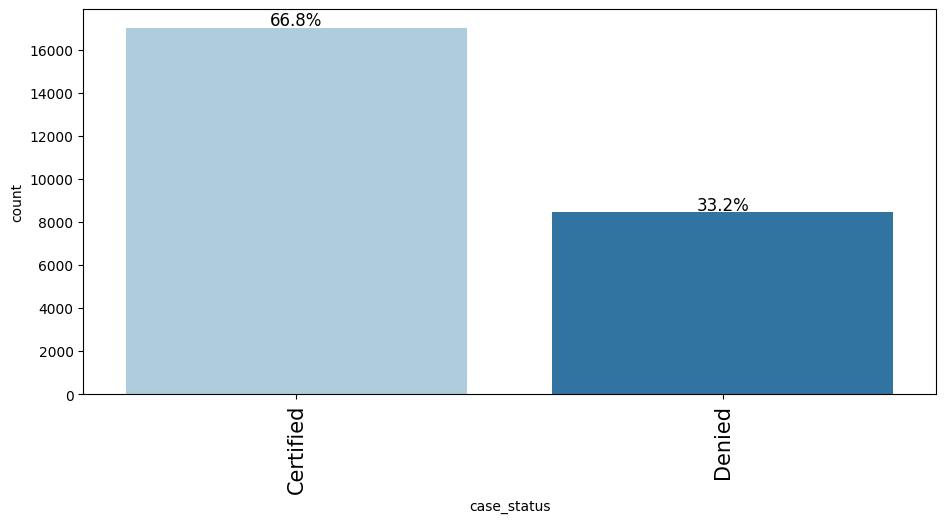

In [115]:

numerical_cols =  data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

for cols in numerical_cols:
    histogram_boxplot(data, cols)

for cols in categorical_cols:
    labeled_barplot(data, cols, perc=True, n=10)



#### Observations on education of employee

In [116]:
data.groupby('education_of_employee').size()
#Most of the visa applicants (78%) have bachelor's or master's degree.
#86.6% have bachelor or above.
#High School and Doctorate are in the lower end catogary

,0
education_of_employee,
Bachelor's,10234
Doctorate,2192
High School,3420
Master's,9634


#### Observations on region of employment

In [117]:
data.groupby('region_of_employment').size()
#Northeast, south and west have almost equal number of applicants. While Midwest and island lag behind.
#This is expected as most midwest states are sparsely populated and isaland population is pretty minimal.

,0
region_of_employment,
Island,375
Midwest,4307
Northeast,7195
South,7017
West,6586


#### Observations on job experience

In [221]:
data.groupby('has_job_experience')['case_status'].value_counts()
#Good volume of applicants have no experience for the job(42%)
#Evidently less candidates with prior work experience are rejected

has_job_experience  case_status
0                   1               5994
                    0               4684
1                   1              11024
                    0               3778
Name: count, dtype: int64

#### Observations on case status

In [119]:
data.groupby('case_status').size()
#There is a 33% denial rate for visa applicants

,0
case_status,
Certified,17018
Denied,8462


### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [120]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [121]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


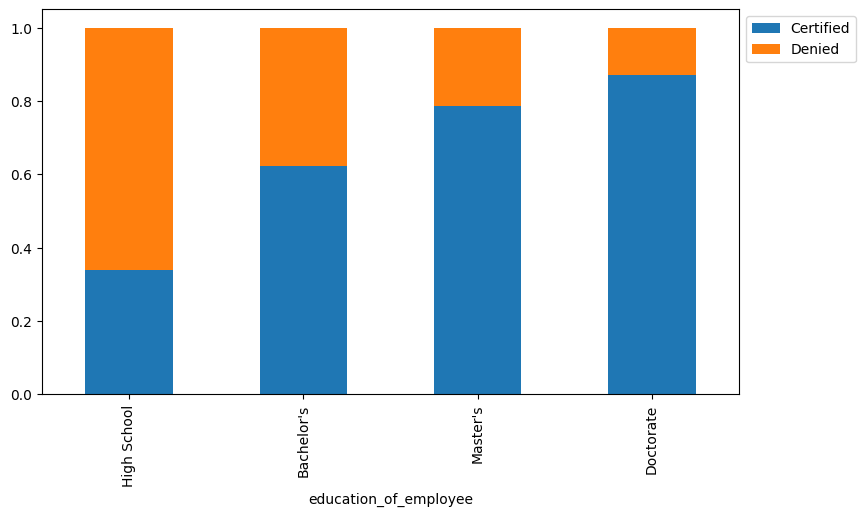

In [122]:
stacked_barplot(data, 'education_of_employee', 'case_status')
#Doctorate has highest approval with 87%
#Masters has the next highest approval with 78%
#Bachelor has the next highest approval with 62%
#High school has the least approval with 34%
#Education level is positively correlated with approval odds

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


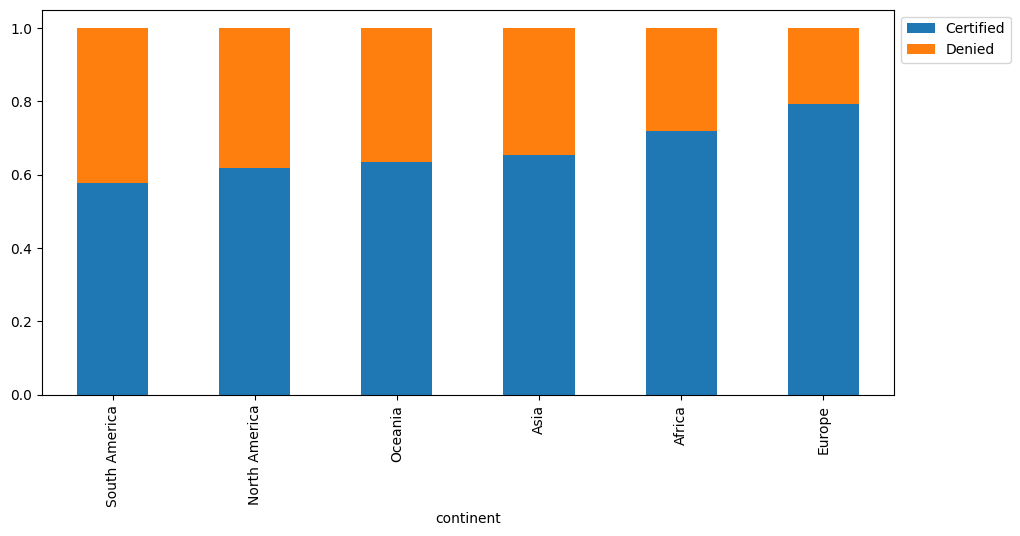

In [123]:
stacked_barplot(data, 'continent', 'case_status')
#Europe and Africa seem to have higher approval odds compared to south/North America

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


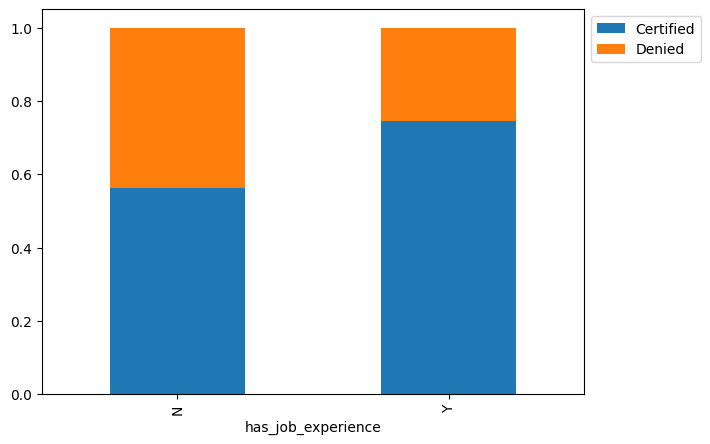

In [124]:
stacked_barplot(data, 'has_job_experience', 'case_status')
#Good volume of applicants have no experience for the job(42%)
#Evidently less candidates with prior work experience are rejected

#### Is the prevailing wage consistent across all regions of the US?

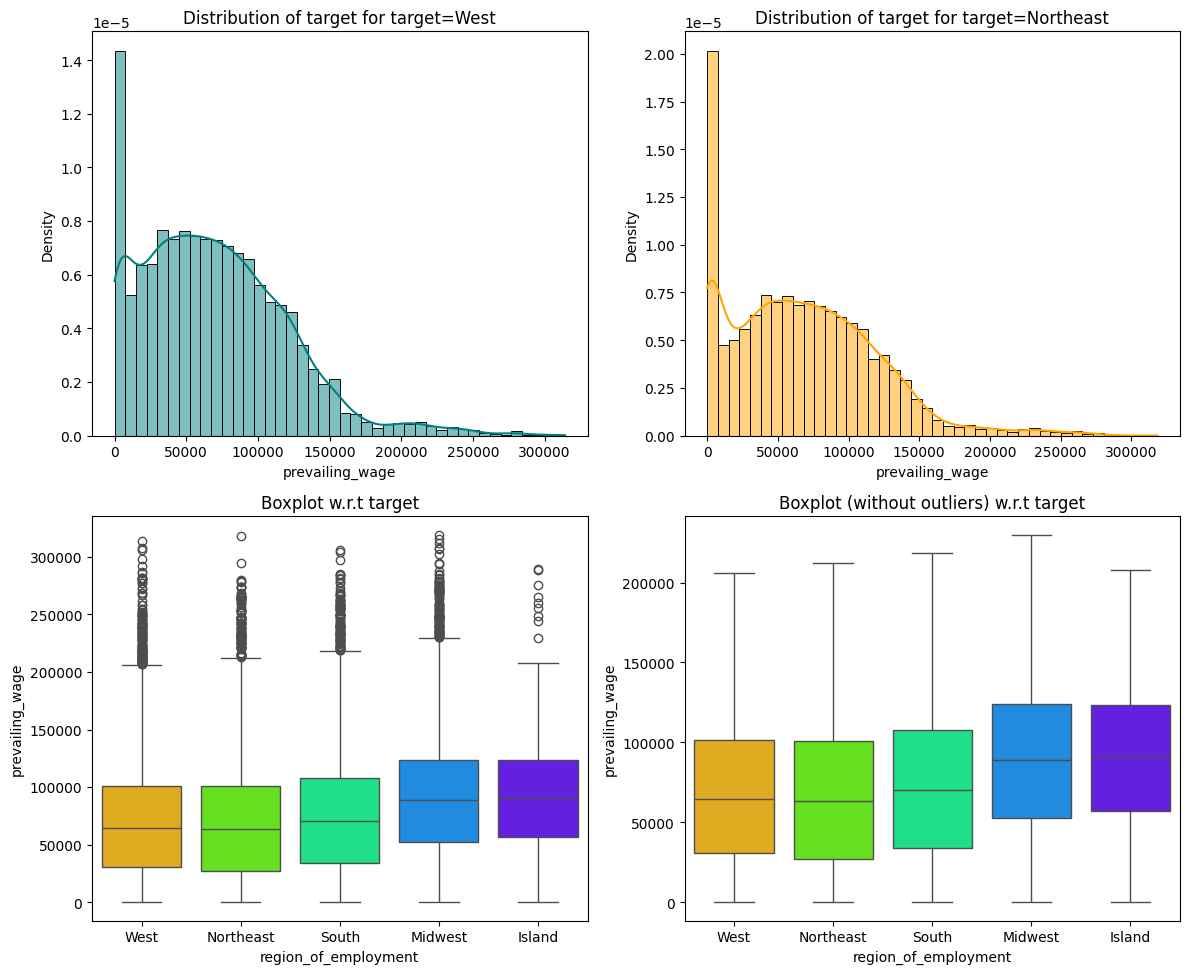

In [125]:
#stacked_barplot(data, 'prevailing_wage', 'case_status')
distribution_plot_wrt_target(data, 'prevailing_wage', 'region_of_employment')
#Midwest and island have higher prevailing wage due to sparse population and relatively less number of applications
#West, Northeast and south have relatively standard prevailing wage due to large application count
#High paying jobs (outliers) are consistently present in all regions


#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

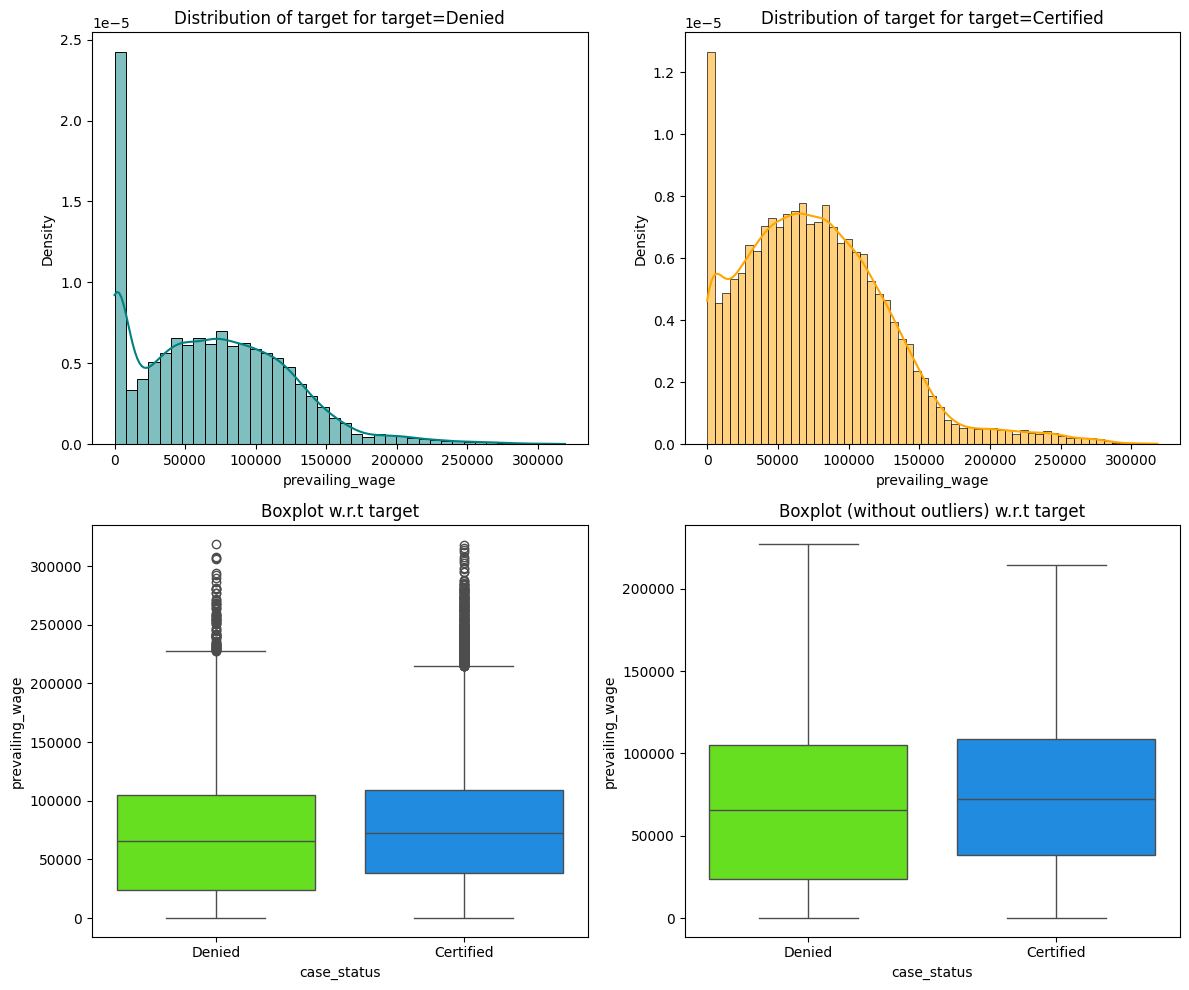

In [126]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')
#Evidently the average prevailing wage is higher for certified applications compared to denied

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


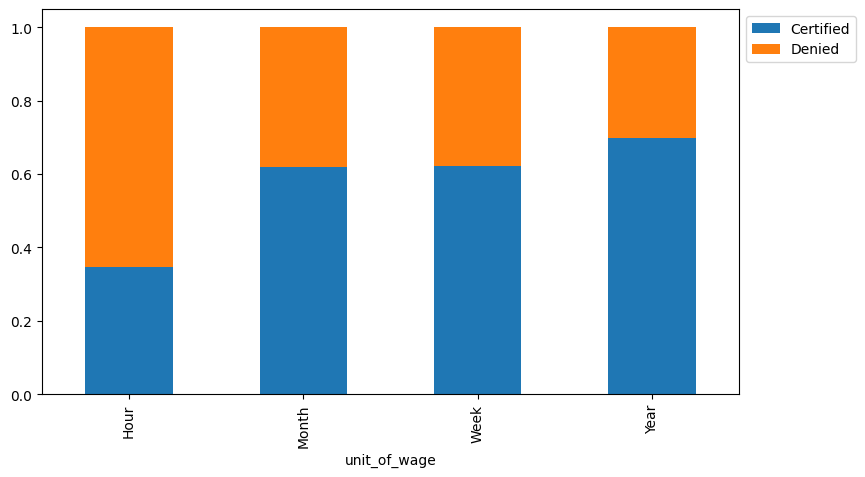

In [127]:
stacked_barplot(data, 'unit_of_wage', 'case_status')
#This may not be a good metric , as majority of the application have yearly unit of wage.

## Data Pre-processing

### Outlier Check

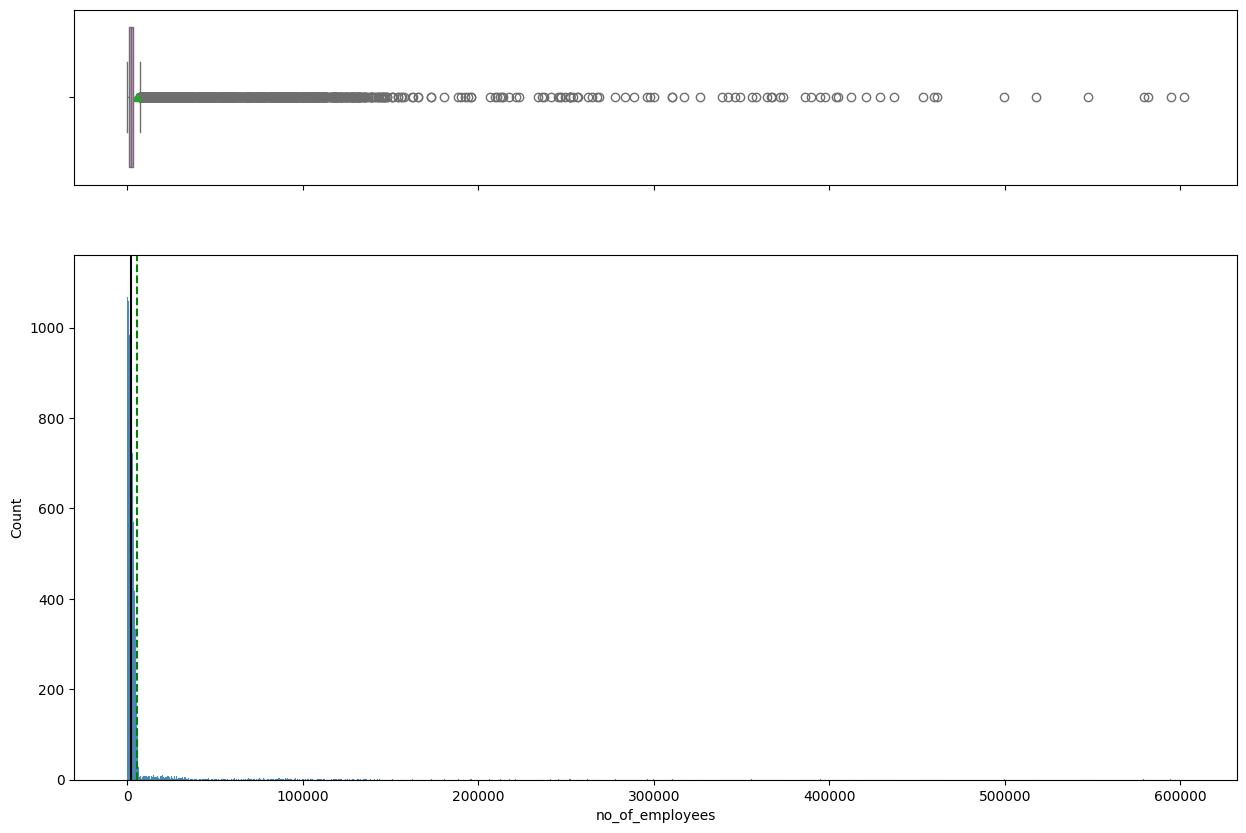

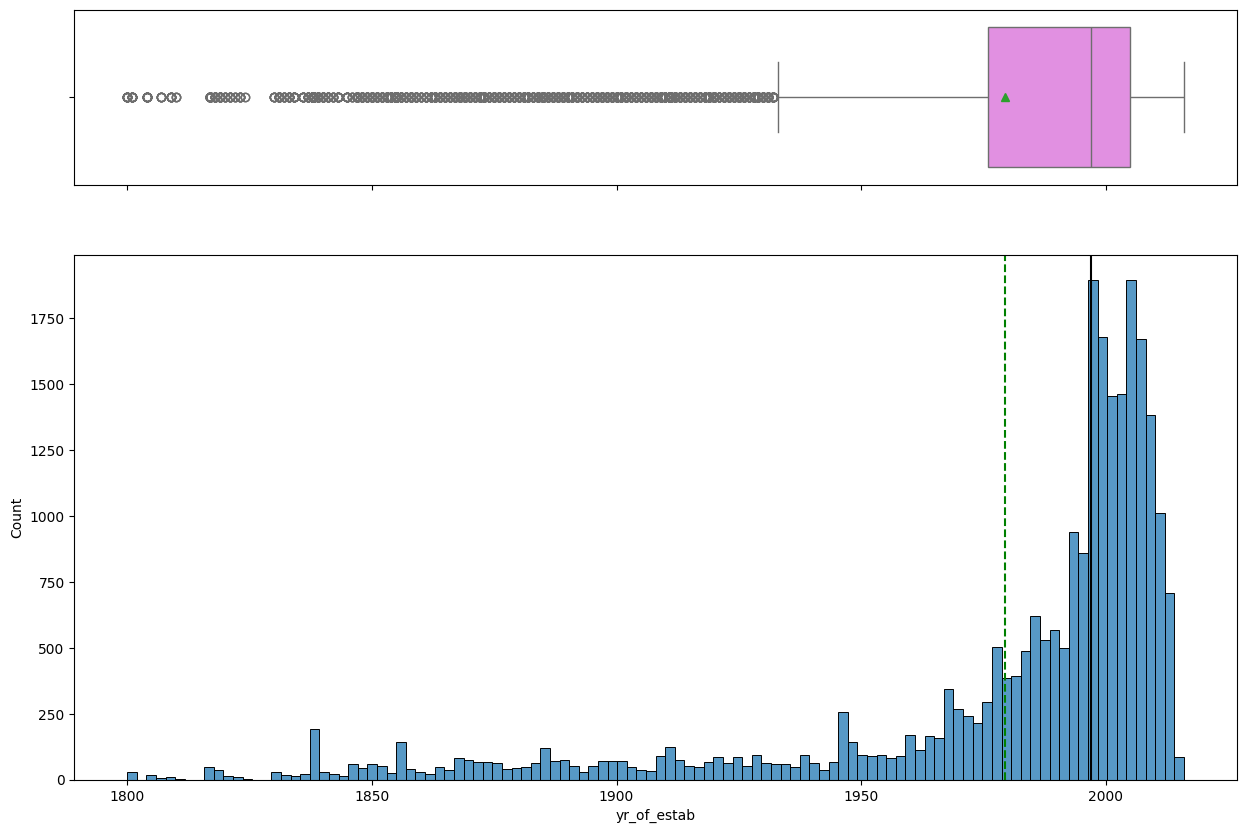

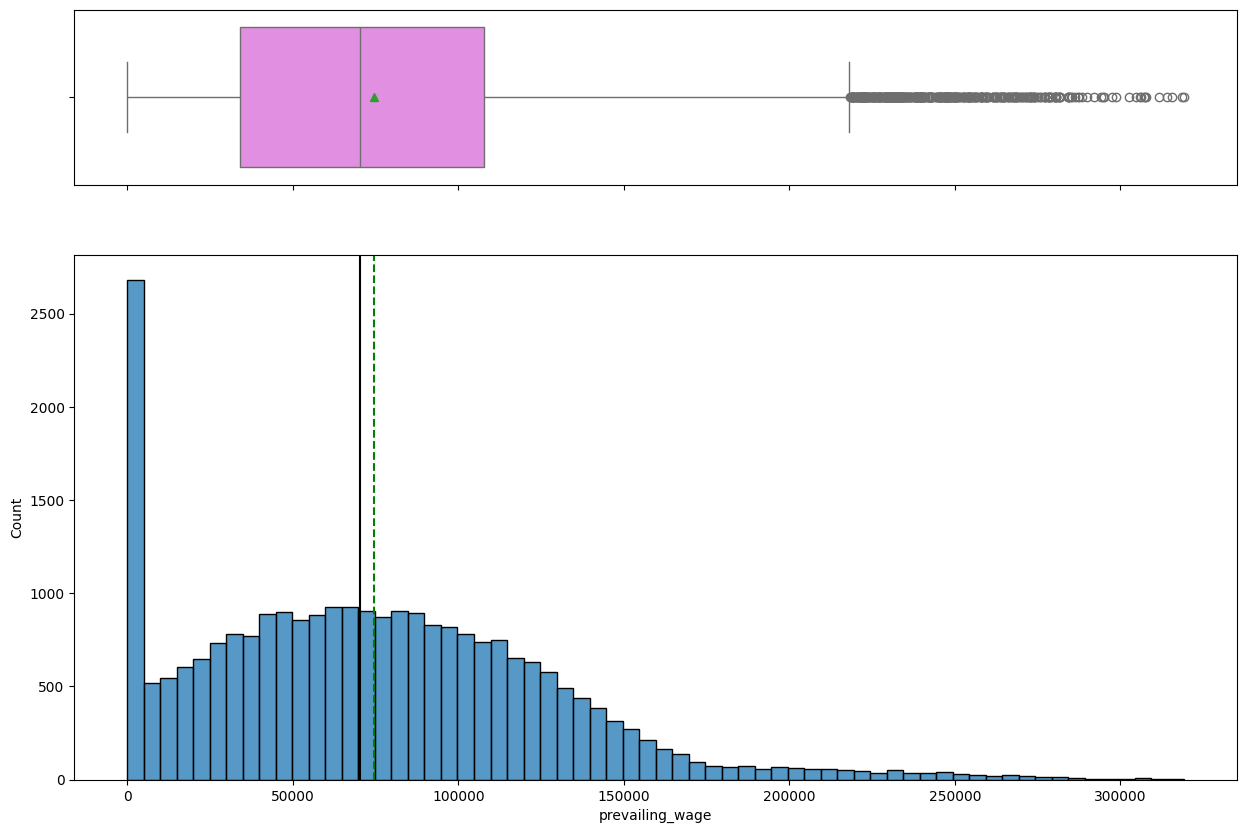

In [128]:
for cols in numerical_cols:
    histogram_boxplot(data, cols)

#Smaller number of companies are very old
#Big corporation(outliers) have huge number of applications to account for size
#Most companies follow a pyramid structure resulting in less applications for top level jobs (high paying/niche qualification)

### Data Preparation for modeling

In [129]:
#Convert all object types to categorical
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()
for cols in categorical_cols:
    data[cols] = data[cols].astype('category')

In [130]:
data.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [134]:
#Convert all binary value columns to 0 and 1s
impacted_columns = [
    col for col in data.columns
    if set(data[col].unique()) <= {'Y', 'N'}  # Checks if all values are 'Y' or 'N'
]

for col in impacted_columns:
    data[col] = data[col].map({'Y': 1, 'N': 0})

data['case_status'] = data['case_status'].map({'Certified': 1, 'Denied': 0})

In [132]:
#Company age is more linear compared to year established
data['company_age'] = pd.Timestamp.now().year - data['yr_of_estab']
data.drop('yr_of_estab', axis=1, inplace=True)

In [135]:
data.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,0,0,14513,West,592.2029,Hour,1,0,18
1,Asia,Master's,1,0,2412,Northeast,83425.6500,Year,1,1,23
2,Asia,Bachelor's,0,1,44444,West,122996.8600,Year,1,0,17
3,Asia,Bachelor's,0,0,98,West,83434.0300,Year,1,0,128
4,Africa,Master's,1,0,1082,South,149907.3900,Year,1,1,20


In [136]:
X = data.drop(['case_status'],axis=1) ## Remove the dependent variable
y = data["case_status"]


# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.3,random_state=1,stratify=y_val
)

#One hot encoding on train/val and test sets separately to avoid data leakage
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

In [142]:
X_train.head(5)

,no_of_employees,prevailing_wage,company_age,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_0,has_job_experience_1,requires_job_training_0,requires_job_training_1,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_0,full_time_position_1
21,1706,137694.98,12,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,True,True,False
7332,2321,11641.40,16,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True
20579,1923,21688.56,20,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True
22326,434,58341.54,27,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
13237,5870,140996.50,14,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True


In [143]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of Validation set :  (5350, 28)
Shape of test set :  (2294, 28)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66785
0    0.33215
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667829
0    0.332171
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [157]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, name,  predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"model":name, "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [145]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [152]:

scorer = metrics.make_scorer(metrics.f1_score)

Since False Positives and False Negatives have similar weightage for the use case, we consider F1 score. The objective of the model is to appropriately tag certified or Denied as much as possible.  Both approval and denial have similar implication on the outcome . **We dont want to miss out on best talent, at the same time, we want to effectively weed out less qualified applicants**

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [191]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

model_score = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=6, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    model_score.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))




Cross-Validation performance on training dataset:

Bagging: 0.7787775965429081
Random forest: 0.8023913576905648
GBM: 0.8242718212768948
Adaboost: 0.8183332739992092
Xgboost: 0.8079132705480849
dtree: 0.7426172913805044


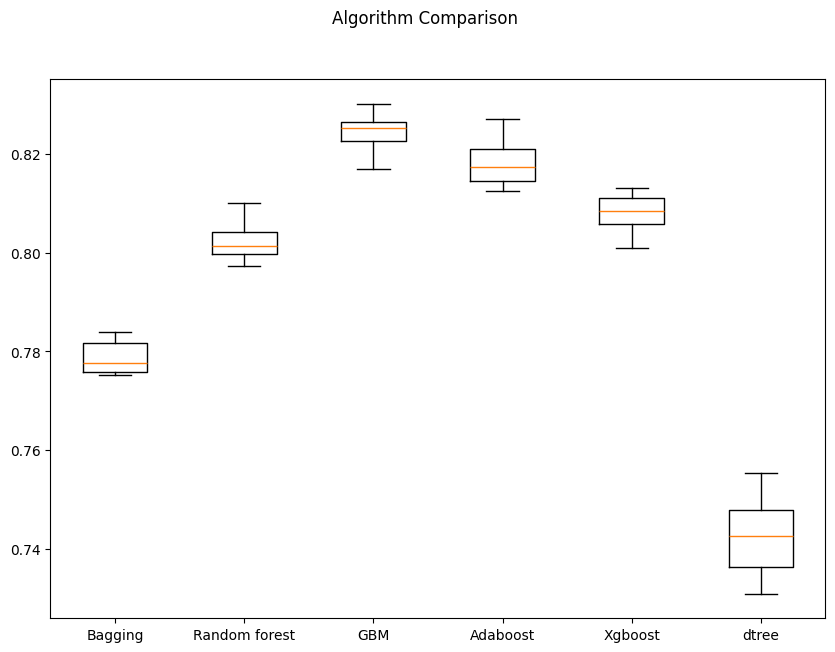

In [192]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(model_score)
ax.set_xticklabels(names)

plt.show()

In [193]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    model.fit(X_train,y_train) ## Complete the code to fit the model on original training data
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_train , y_train)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.984245  0.984807   0.991548  0.988166
0  Random forest  1.000000  1.000000   1.000000  1.000000
0            GBM  0.757849  0.883657   0.782095  0.829780
0       Adaboost  0.736824  0.887266   0.759285  0.818301
0        Xgboost  0.840884  0.930664   0.846400  0.886534
0          dtree  1.000000  1.000000   1.000000  1.000000


In [194]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_val, y_val)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.702804  0.774699   0.779060  0.776873
0  Random forest  0.723738  0.835712   0.770183  0.801611
0            GBM  0.746355  0.882732   0.770772  0.822962
0       Adaboost  0.731776  0.888609   0.753799  0.815671
0        Xgboost  0.727290  0.854464   0.764780  0.807138
0          dtree  0.657757  0.738035   0.746602  0.742294


### Model Building with Oversampled data

In [195]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Step 1: Filter only the minority class (label = 0)
X_minority = X_train[y_train == 0]

# Step 2: Fit Nearest Neighbors on minority class only
k_to_test = 10  # max neighbors you want to check
nn = NearestNeighbors(n_neighbors=k_to_test + 1)  # +1 because the closest is itself
nn.fit(X_minority)

# Step 3: Find distances to neighbors
distances, indices = nn.kneighbors(X_minority)

# Step 4: Remove the 0-th column (distance to itself = 0)
neighbor_dists = distances[:, 1:]

# Step 5: Analyze average distances to neighbors
mean_dists = neighbor_dists.mean(axis=1)

# Step 6: Show summary statistics
print("Summary of average distances to nearest neighbors (excluding self):")
print(pd.Series(mean_dists).describe())

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

Summary of average distances to nearest neighbors (excluding self):
count      5923.000000
mean       1371.811997
std        6162.952735
min          31.054133
25%         373.470325
50%         494.614291
75%         683.402373
max      242775.986684
dtype: float64


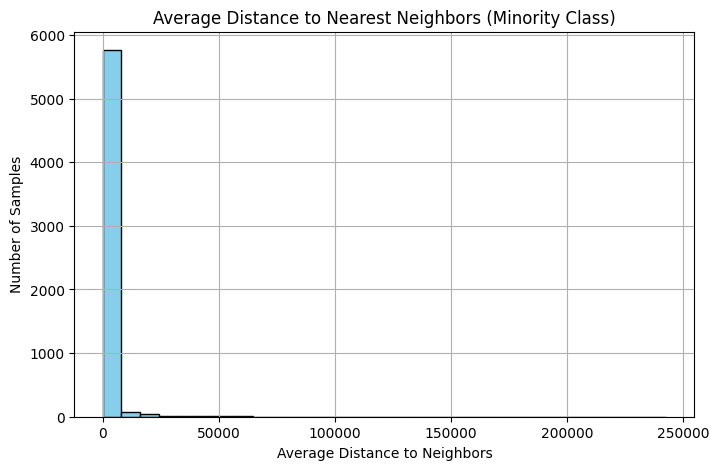

In [196]:
plt.figure(figsize=(8, 5))
plt.hist(mean_dists, bins=30, color='skyblue', edgecolor='black')
plt.title("Average Distance to Nearest Neighbors (Minority Class)")
plt.xlabel("Average Distance to Neighbors")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

In [197]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors= 3, random_state=1) ## Complete the code to set the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 28)
After OverSampling, the shape of train_y: (23826,) 



In [198]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

model_score = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=6, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scorer,cv=kfold
    )
    model_score.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")



Cross-Validation performance on training dataset:

Bagging: 0.7733023383482721
Random forest: 0.8023358862351678
GBM: 0.8188691859337824
Adaboost: 0.7961211902058446
Xgboost: 0.8092315401188821
dtree: 0.7432842269736323

Validation Performance:



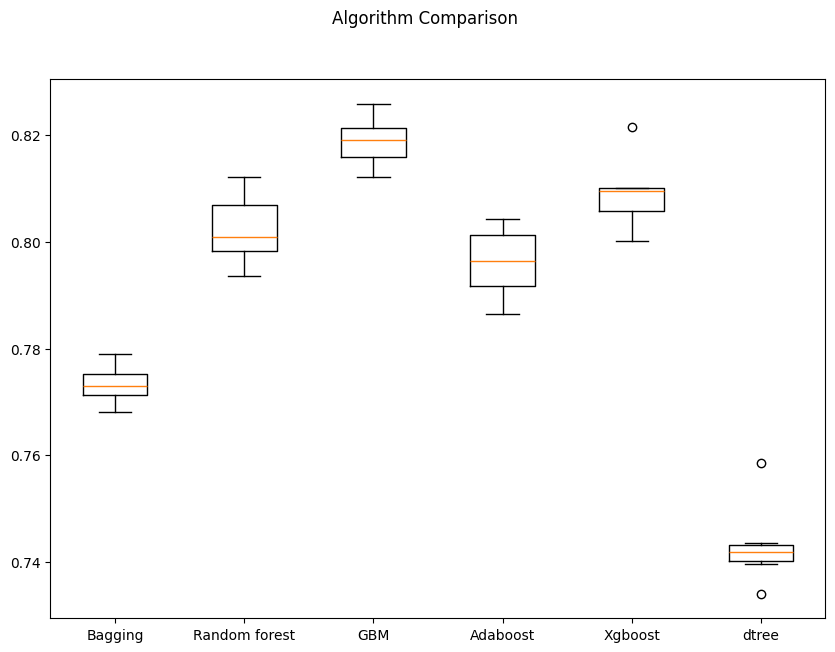

In [199]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(model_score)
ax.set_xticklabels(names)

plt.show()

In [200]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    model.fit(X_train_over,y_train_over) ## Complete the code to fit the model on original training data
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_train_over , y_train_over)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.987451  0.983967   0.990871  0.987407
0  Random forest  1.000000  1.000000   1.000000  1.000000
0            GBM  0.812054  0.873835   0.777736  0.822990
0       Adaboost  0.781835  0.837405   0.753645  0.793320
0        Xgboost  0.869932  0.920171   0.836156  0.876154
0          dtree  1.000000  1.000000   1.000000  1.000000


In [201]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_val , y_val)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.690093  0.767142   0.768433  0.767787
0  Random forest  0.719813  0.828435   0.769631  0.797951
0            GBM  0.745421  0.872656   0.774658  0.820742
0       Adaboost  0.721121  0.839910   0.765366  0.800907
0        Xgboost  0.738505  0.857543   0.774911  0.814136
0          dtree  0.661308  0.745032   0.747123  0.746076


### Model Building with Undersampled data

In [202]:
tl = TomekLinks(sampling_strategy='auto')
X_train_un, y_train_un = tl.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 9643
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (15566, 28)
After UnderSampling, the shape of train_y: (15566,) 



In [203]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

model_score = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=6, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer,cv=kfold
    )
    model_score.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))



Cross-Validation performance on training dataset:

Bagging: 0.7456676768784621
Random forest: 0.7749612110929028
GBM: 0.8003411461449611
Adaboost: 0.7979453892789863
Xgboost: 0.7886183030990894
dtree: 0.7107770309966425

Validation Performance:



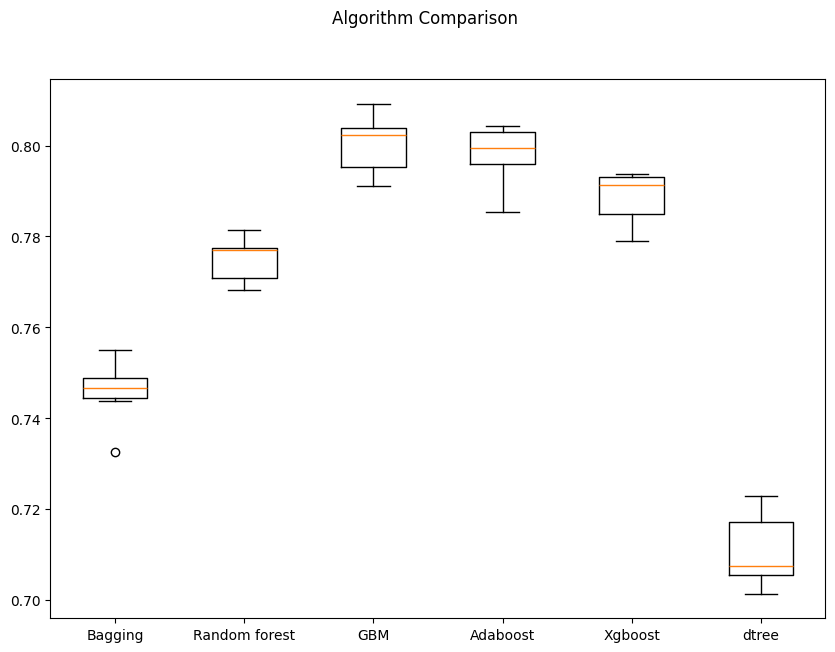

In [204]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(model_score)
ax.set_xticklabels(names)

plt.show()

In [205]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    model.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original training data
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_train_un , y_train_un)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.983682  0.982163   0.991416  0.986768
0  Random forest  0.999936  1.000000   0.999896  0.999948
0            GBM  0.747205  0.860209   0.762268  0.808283
0       Adaboost  0.729731  0.869750   0.739725  0.799485
0        Xgboost  0.842220  0.919112   0.840972  0.878307
0          dtree  1.000000  1.000000   1.000000  1.000000


In [206]:
df_perf = pd.DataFrame(columns=["model", "Accuracy", "Recall", "Precision", "F1"])
for name, model in models:
    df_perf = pd.concat([df_perf, model_performance_classification_sklearn(model, name, X_val , y_val)])
print(df_perf)

           model  Accuracy    Recall  Precision        F1
0        Bagging  0.688411  0.730199   0.787742  0.757879
0  Random forest  0.717383  0.792611   0.786012  0.789298
0            GBM  0.743364  0.851106   0.783359  0.815828
0       Adaboost  0.738131  0.863140   0.771772  0.814903
0        Xgboost  0.725047  0.817520   0.781016  0.798851
0          dtree  0.641308  0.696893   0.748647  0.721844


Based on sampling the data with both oversampling and undersampling , **Oversampling** seems to have slight better performance interms of F1 Score . Hence i proceed with oversampling for various models.

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [207]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 85, 100, 200], ## Complete the code to set the number of estimators
    "learning_rate": [0.01, 0.1, 0.5, 1.0], ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1),]
}

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=cv,
    random_state=1,
    verbose = 2
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 10min 39s, sys: 1.06 s, total: 10min 40s
Wall time: 11min 16s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 75, 85, 100, 200]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [208]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8124431098197711:


In [209]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=200, random_state=1)

In [212]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada,"adaboost_oversampled", X_train_over, y_train_over)
tuned_ada_train_perf

,model,Accuracy,Recall,Precision,F1
0,adaboost_oversampled,0.804331,0.837824,0.785225,0.810673


In [213]:
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada,"adaboost_oversampled_validation", X_val,y_val)
tuned_ada_val_perf

,model,Accuracy,Recall,Precision,F1
0,adaboost_oversampled_validation,0.73028,0.834593,0.777778,0.805184


**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [214]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ['sqrt', 'log2', 0.3, 0.5, None],
    "max_samples": [0.5, 0.7, 0.9, None],
}

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=cv, ## Complete the code to set the cv parameter
    random_state=1,
    verbose = 2
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   3.9s
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   3.6s
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   3.9s
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   5.4s
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   3.6s
[CV] END max_features=log2, max_samples=None, min_samples_leaf=4, n_estimators=125; total time=   3.5s
[CV] END max_features=log2, max_samples=0.9, min_samples_leaf=6, n_estimators=100; total time=   5.1s
[CV] END max_features=log2, max_samples=0.9, min_samples_leaf=6, n_estimators=100; total time=   3.4s
[CV] END max_features=log2, max_samples=0.9, min_samples_leaf=6, n_estimators=100; total time=   2.8s
[CV] END max_f

RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5, None],
                                        'max_samples': [0.5, 0.7, 0.9, None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=2)

In [215]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'min_samples_leaf': 4, 'max_samples': None, 'max_features': 'log2'} with CV score=0.8208346138712797:


In [216]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf
tuned_rf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       n_estimators=125, random_state=1)

In [217]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, "rf_oversampled", X_train_over, y_train_over
)
tuned_rf_train_perf

,model,Accuracy,Recall,Precision,F1
0,rf_oversampled,0.837782,0.882481,0.810063,0.844723


In [218]:
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf, 'rf_oversampled_validation',X_val,y_val)
tuned_rf_val_perf

,model,Accuracy,Recall,Precision,F1
0,rf_oversampled_validation,0.744112,0.860341,0.779412,0.817879


**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [219]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={
    "n_estimators": [50, 100, 150, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "subsample":[0.5, 0.7, 0.9, 1.0],
    "max_features":['sqrt', 'log2', 0.3, 0.5, None]
}

# Stratified K-Fold CV to preserve class imbalance
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=cv, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 12min 54s, sys: 1.73 s, total: 12min 55s
Wall time: 14min 14s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5, None],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300],
                                        'subsample': [0.5, 0.7, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [220]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 200, 'max_features': None, 'learning_rate': 0.1} with CV score=0.8199215238653875:


In [222]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(n_estimators=200, random_state=1)

In [223]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, "gbm_oversampled", X_train_over, y_train_over
)
tuned_gbm_train_perf

,model,Accuracy,Recall,Precision,F1
0,gbm_oversampled,0.819399,0.877277,0.786262,0.82928


In [224]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,"gbm_oversampled_validation",X_val,y_val)
tuned_gbm_val_perf

,model,Accuracy,Recall,Precision,F1
0,gbm_oversampled_validation,0.744486,0.867338,0.776303,0.819299


**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [225]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={
    'n_estimators':[50,75,100,125],
    'subsample':[0.5, 0.7, 0.8, 1.0],
    'gamma':[0, 0.1, 0.3, 0.5, 1],
    'colsample_bytree':[0.3, 0.5, 0.7, 1.0],
    'colsample_bylevel':[0.3, 0.5, 0.7, 1.0]
}

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=cv, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on oversampled data

CPU times: user 3min 24s, sys: 1.27 s, total: 3min 26s
Wall time: 2min 11s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           impo...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.3, 0.5, 0.7,
                                                              1.0],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5, 1],
                                        'n_estimators': [50, 75, 100, 125],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [226]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 125, 'gamma': 1, 'colsample_bytree': 0.5, 'colsample_bylevel': 1.0} with CV score=0.8196848096135114:


In [227]:
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [228]:
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, "xgb_oversampled", X_train_over, y_train_over
)
tuned_xgb_train_perf

,model,Accuracy,Recall,Precision,F1
0,xgb_oversampled,0.831067,0.88374,0.799514,0.83952


In [229]:
## Complete the code to print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb,"xgb_oversampled_validation",X_val, y_val)
tuned_xgb_val_perf

,model,Accuracy,Recall,Precision,F1
0,xgb_oversampled_validation,0.742804,0.86454,0.775936,0.817845


## Model Performance Summary and Final Model Selection

In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T,
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with oversampled data
model,gbm_oversampled,xgb_oversampled,adaboost_oversampled,rf_oversampled
Accuracy,0.819399,0.831067,0.804331,0.837782
Recall,0.877277,0.88374,0.837824,0.882481
Precision,0.786262,0.799514,0.785225,0.810063
F1,0.82928,0.83952,0.810673,0.844723


In [236]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T,
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with oversampled data
model,gbm_oversampled_validation,xgb_oversampled_validation,adaboost_oversampled_validation,rf_oversampled_validation
Accuracy,0.744486,0.742804,0.73028,0.744112
Recall,0.867338,0.86454,0.834593,0.860341
Precision,0.776303,0.775936,0.777778,0.779412
F1,0.819299,0.817845,0.805184,0.817879


Reasons to pick Random forest as the final model

- High training F1 score: **0.845**

- Strong validation F1 score: 0.818

- Strong generalization: **0.027**

Gradient boosting seems to be the next best option. Very minimal difference in performance from Random forest.

In [237]:
# selecting the final model
final_model = tuned_rf

In [238]:
test = model_performance_classification_sklearn(final_model,"final_model", X_test, y_test)
test

,model,Accuracy,Recall,Precision,F1
0,final_model,0.740628,0.847911,0.782059,0.813655


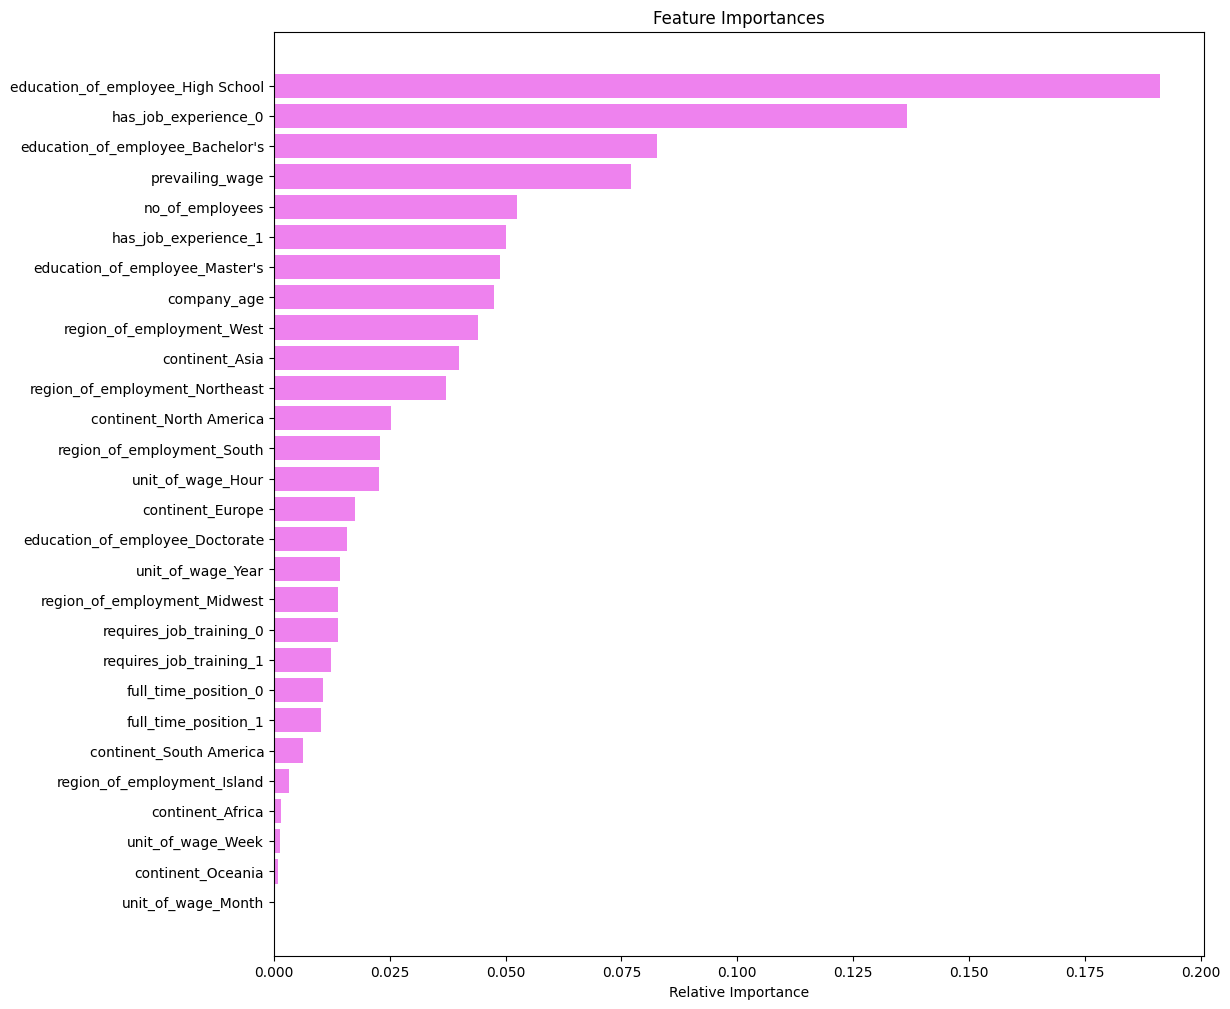

In [239]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

***Education is the Most Influential Factor***
- education_of_employee_High School is the most important feature by far
- Bachelor's, Master's, and Doctorate have progressively lower importance.

**Implication:**
High school education negatively or strongly correlates with the outcome (likely visa rejection or lower job suitability). The system is highly sensitive to low education levels.

**Recommendation:**
- Focus hiring or visa sponsorship on candidates with Bachelor’s or higher.
- Build a separate assessment track or skill validation method for high-school-only candidates to reduce unfair bias.



***Job Experience is a Strong Predictor***
- has_job_experience_0 and has_job_experience_1 are among the top 6 features.

**Implication:**
Job experience is a critical eligibility or approval factor.

**Recommendation:**

- Prefer candidates with some prior experience when possible.
- Consider building structured internship-to-fulltime pathways to develop experience in-house.



***Prevailing Wage and Company Size Matter***
- prevailing_wage and no_of_employees have meaningful importance.

**Implication:**
Higher wages and larger employers positively influence outcomes (likely visa approvals or model predictions).

**Recommendation:**

- Ensure transparent and competitive wage benchmarking
- For smaller companies, proactively document financial and operational strength when applying for visas



***Geography Has Moderate Impact***
- region_of_employment_West, Northeast, and South have mid-level importance
- continent_Asia, North America, and Europe appear too — likely applicant origin.

**Implication:**
Location influences outcome—either due to regional quotas, historical bias, or differing approval rates.

**Recommendation:**

- Monitor and optimize for regional differences in success rate.
- If West and Northeast fare better, consider relocating or classifying job postings in those regions where feasible.



***Company Age Affects the Prediction***
- company_age is moderately important.

**Implication:**
Younger companies may face more scrutiny.

**Recommendation:**

- For startups, include detailed company financials and growth plans in visa applications.



***Wage Unit & Training Have Lower Importance***
- unit_of_wage_Hour, unit_of_wage_Year, and requires_job_training_0 are low-impact.

**Implication:**
These factors don't move the needle much.

**Recommendation:**

- Standardize wage units and avoid over-optimizing here.
- Don’t overweigh training/no-training when screening candidates.



**Strategic Recommendations**
- Prioritize Bachelor’s+ and experienced candidates for smoother approval or onboarding.
- Include high wage offers and clear role descriptions to boost likelihood.
- Build alternate pathways for underrepresented groups (e.g. high-school educated) through skills assessments.
- For young or small companies, include stability signals like funding, partnerships, or market validation.
- Explore regional trends in outcomes and adapt recruitment geography accordingly.

<font size=6 color='blue'>Power Ahead</font>
___